### ANN Model por Failure Machine Detection
This script will load a set of tabular data with a target feature to perform supervices training of a electricak generator and predict a failure.

- Jonathan Espín Martin 00339306
- Master Degree

Torch Verifications

In [ ]:
#torch device verification
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
#number of cores available
import multiprocessing
print(multiprocessing.cpu_count())

40


Get the dataframe (tabular)

In [ ]:
#data frame definition based on files
import pandas as pd
import os
exportPath = r"/home/jespinm/power_gen_data/Export10Sec"
files_data = os.listdir(exportPath)
powerdata_dfs = []
for fd in sorted(files_data):
  if fd.endswith(".csv"):
    if fd.endswith("_01.csv"):
      print(fd)
    powerdata_dfs.append(pd.read_csv(f'{exportPath}/%s' % fd,engine='pyarrow', quotechar='"',doublequote=True))
power_df = pd.concat(powerdata_dfs, ignore_index = True)
power_df.t_stamp = pd.to_datetime(power_df.t_stamp)
power_df = power_df.sort_values(by='t_stamp', ascending=True)
power_df.set_index("t_stamp", inplace = True)

#fill nans and clip to 0 (little eda)
power_df = power_df.fillna(0)
power_df = power_df.clip(lower=0)
power_df

2019_05_01.csv
2019_06_01.csv
2019_07_01.csv
2019_08_01.csv
2019_09_01.csv
2019_10_01.csv
2019_11_01.csv
2019_12_01.csv
2020_01_01.csv
2020_02_01.csv
2020_03_01.csv
2020_04_01.csv
2020_05_01.csv
2020_06_01.csv
2020_07_01.csv
2020_08_01.csv
2020_09_01.csv
2020_10_01.csv
2020_11_01.csv
2020_12_01.csv
2021_01_01.csv
2021_02_01.csv
2021_03_01.csv
2021_04_01.csv
2021_05_01.csv
2021_06_01.csv
2021_07_01.csv
2021_08_01.csv
2021_09_01.csv
2021_10_01.csv
2021_11_01.csv


,cfcfe6/g6actuatorout,cfcfe6/g6aparentpowerpmu,cfcfe6/g6avgcyltmp,cfcfe6/g6enginestop,cfcfe6/g6frequencyhzeu,cfcfe6/g6fueloilcomsum,cfcfe6/g6fueloilinflow,cfcfe6/g6fueloiloutflow,cfcfe6/g6hzcv,cfcfe6/g6kwsp,...,cfcfe6/g6te708,cfcfe6/g6te709,cfcfe6/g6te710,cfcfe6/g6te711,cfcfe6/g6te801eu,cfcfe6/g6te802eu,cfcfe6/g6te803eu,cfcfe6/g6te804eu,cfcfe6/g6te805eu,cfcfe6/g6failure
t_stamp,,,,,,,,,,,,,,,,,,,,,
2019-05-01 00:00:00,0.000000,6489.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-05-01 00:00:10,0.000000,6498.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-05-01 00:00:20,0.000000,6480.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-05-01 00:00:30,0.000000,6500.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-05-01 00:00:40,0.000000,6487.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30 23:59:10,3.227802,59.748323,42.584731,0,0.285149,7.653473,4.879628,6.416220,1.683695,6694.599590,...,0.0,0.0,0.0,0.0,81.863647,82.829318,91.286142,79.194735,82.513632,0
2021-11-30 23:59:20,3.227814,59.748557,42.584773,0,0.285150,7.653503,4.879646,6.416245,1.683701,6694.599044,...,0.0,0.0,0.0,0.0,81.863649,82.829323,91.286138,79.194736,82.513634,0
2021-11-30 23:59:30,3.227826,59.748790,42.584814,0,0.285151,7.653532,4.879665,6.416270,1.683708,6694.598497,...,0.0,0.0,0.0,0.0,81.863652,82.829327,91.286134,79.194738,82.513636,0


Get some information of the dataframe

In [ ]:
#get some info from the dataset
power_df.info()
num_rows, num_columns = power_df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8164800 entries, 2019-05-01 00:00:00 to 2021-11-30 23:59:50
Data columns (total 89 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   cfcfe6/g6actuatorout       float64
 1   cfcfe6/g6aparentpowerpmu   float64
 2   cfcfe6/g6avgcyltmp         float64
 3   cfcfe6/g6enginestop        int64  
 4   cfcfe6/g6frequencyhzeu     float64
 5   cfcfe6/g6fueloilcomsum     float64
 6   cfcfe6/g6fueloilinflow     float64
 7   cfcfe6/g6fueloiloutflow    float64
 8   cfcfe6/g6hzcv              float64
 9   cfcfe6/g6kwsp              float64
 10  cfcfe6/g6loadkweu          float64
 11  cfcfe6/g6pf                float64
 12  cfcfe6/g6pmuil1            float64
 13  cfcfe6/g6pmuil2            float64
 14  cfcfe6/g6pmuil3            float64
 15  cfcfe6/g6pmuu12            float64
 16  cfcfe6/g6pmuu23            float64
 17  cfcfe6/g6pmuu31            float64
 18  cfcfe6/g6presssp           float64
 19  cfcfe6/g6

Prepare for training making spliting and pre-process like variance and balancing. The balancing aims to no tolerance to false - negatives

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

#set numpy seed
seed = 11
np.random.seed(seed)

#separe the train set and target vector
X = power_df.drop('cfcfe6/g6failure', axis=1)
y = power_df['cfcfe6/g6failure']

#check for missing and non-finite values
missing_values = X.isna().sum().sum()
non_finite_values = (~np.isfinite(X)).sum().sum()
print(f"Missing values: {missing_values}")
print(f"Non-finite values: {non_finite_values}")

#handle missing and non-finite values
if missing_values > 0:
    X = X.fillna(X.mean())
if non_finite_values > 0:
    X = X.replace([np.inf, -np.inf], np.nan).dropna()

#split the data into training and remaining sets (85% training, 15% remaining)
X_train_raw, X_remaining, y_train_raw, y_remaining = train_test_split(X, y, test_size=0.15, random_state=seed, stratify=y)

#split the remaining data into validation and test sets (50% each of the 15% remaining)
X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=seed, stratify=y_remaining)

#apply VarianceThreshold feature selection
selector = VarianceThreshold(threshold=0.0)
X_train_selected = selector.fit_transform(X_train_raw)
selected_features = selector.get_support(indices=True)
selected_feature_names = X_train_raw.columns[selected_features]

#update the DataFrames with selected features
X_train = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_val_selected = selector.transform(X_val_raw)
X_val = pd.DataFrame(X_val_selected, columns=selected_feature_names)
X_test_selected = selector.transform(X_test_raw)
X_test = pd.DataFrame(X_test_selected, columns=selected_feature_names)

#apply Normalization/Standardization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#apply SMOTE after scaling
smote = SMOTE(sampling_strategy=0.8, random_state=seed)
X_train_final, y_train_final = smote.fit_resample(X_train_scaled, y_train_raw)

Missing values: 0
Non-finite values: 0


Preconfig on joblib

In [ ]:
#helps to avoid problem when joblib tmp default is full > /tmp
%env JOBLIB_TEMP_FOLDER=/tmp

env: JOBLIB_TEMP_FOLDER=/tmp


Define ann, train and save model

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, make_scorer
from sklearn.base import BaseEstimator, ClassifierMixin
import time
import os
import joblib
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import make_scorer, recall_score, fbeta_score
import gc
from itertools import product
from datetime import datetime

#ensure GPU memory grows as needed
torch.cuda.set_device(3) #in this case cuda 3 was available
torch.cuda.empty_cache()
torch.manual_seed(seed)

#define the artificial neural network (ANN) model class - inherit from nn.Model
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_layers, dropout_rate):
        super(ANNModel, self).__init__()
        layers = []
        in_features = input_dim
        #add hidden layers with ReLU activations and dropout
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(in_features, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            in_features = hidden_dim
        #output layer without sigmoid since BCEWithLogitsLoss applies sigmoid internally
        layers.append(nn.Linear(in_features, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

#wrapper class to integrate PyTorch model with scikit-learn's API
class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, hidden_layers=None, dropout_rate=None, learning_rate=None, num_epochs=None, batch_size=None, patience=None, accumulation_steps=None):
        #initialize the model with parameters provided by RandomizedSearchCV or default to None
        self.input_dim = input_dim
        self.hidden_layers = hidden_layers
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.patience = patience
        self.accumulation_steps = accumulation_steps
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        #initialize the model if parameters are provided, else set to None (will be set during fit)
        if all(param is not None for param in [hidden_layers, dropout_rate, learning_rate, num_epochs, batch_size, patience, accumulation_steps]):
            self._initialize_model()
        else:
            self.model = None

    def _initialize_model(self):
        #this function initializes the model, optimizer, and other components
        self.model = ANNModel(input_dim=self.input_dim, hidden_layers=self.hidden_layers, dropout_rate=self.dropout_rate).to(self.device)
        self.criterion = nn.BCEWithLogitsLoss().to(self.device)  # Use BCEWithLogitsLoss
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.scaler = GradScaler()
        self.classes_ = None

    def fit(self, X, y, X_val=None, y_val=None):
        #if the model hasn't been initialized, initialize it now with the given parameters
        if self.model is None:
            self._initialize_model()

        self.classes_ = np.unique(y)

        #lists to store metrics for analysis
        self.train_f2_scores = []
        self.val_f2_scores = []
        self.train_losses = []
        self.val_losses = []

        #convert input data to NumPy arrays if they are pandas DataFrames or Series
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values

        #convert the data to PyTorch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.float32).to(self.device)

        if X_val is not None and y_val is not None:
            if isinstance(X_val, pd.DataFrame):
                X_val = X_val.values
            if isinstance(y_val, pd.Series):
                y_val = y_val.values

            X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(self.device)
            y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(self.device)
        else:
            X_val_tensor = None
            y_val_tensor = None

        #create DataLoader for batching the training data
        train_data = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        train_loader = torch.utils.data.DataLoader(train_data, batch_size=self.batch_size, shuffle=True)

        best_loss = np.inf  #initialize best loss for early stopping
        patience_counter = 0  #counter for early stopping patience

        #start epochs in batches
        for epoch in range(self.num_epochs):
            self.model.train()
            epoch_loss = 0.0
            y_train_pred = []
            y_train_true = []

            #gradient accumulation across batches
            for i, (inputs, labels) in enumerate(train_loader):
                self.optimizer.zero_grad()  #zero the gradients
                with autocast():
                    outputs = self.model(inputs).squeeze()
                    loss = self.criterion(outputs, labels) / self.accumulation_steps
                self.scaler.scale(loss).backward()  #scale the loss and backpropagate

                if (i + 1) % self.accumulation_steps == 0:
                    self.scaler.step(self.optimizer)  #update the model parameters
                    self.scaler.update()  #update the scaler for mixed precision

                epoch_loss += loss.item() * self.accumulation_steps

                y_train_pred.extend((torch.sigmoid(outputs) > 0.5).cpu().numpy().astype(int))  #apply sigmoid for predictions
                y_train_true.extend(labels.cpu().numpy().astype(int))

            #calculate training F2 score for the epoch
            train_f2 = fbeta_score(y_train_true, y_train_pred, beta=2)
            self.train_f2_scores.append(train_f2)  #track F2 scores in the appropriate list
            self.train_losses.append(epoch_loss / len(train_loader))

            #validation phase
            if X_val_tensor is not None and y_val_tensor is not None:
                self.model.eval()
                with torch.no_grad():
                    val_outputs = self.model(X_val_tensor).squeeze()
                    val_loss = self.criterion(val_outputs, y_val_tensor).item()
                    y_val_pred = (torch.sigmoid(val_outputs) > 0.5).cpu().numpy().astype(int)  #apply sigmoid for predictions
                    val_f2 = fbeta_score(y_val_tensor.cpu().numpy().astype(int), y_val_pred, beta=2)

                self.val_f2_scores.append(val_f2)
                self.val_losses.append(val_loss)

                #print epoch progress with validation metrics
                current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                print(f"Epoch {epoch+1}/{self.num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}, Train F2: {train_f2:.4f}, Val F2: {val_f2:.4f}, Time: {current_time}")

                #clear GPU cache after each epoch
                #delete old tensors
                del inputs, labels, outputs, loss
                gc.collect()
                torch.cuda.empty_cache()

                if val_loss < best_loss:
                    best_loss = val_loss
                    patience_counter = 0  #reset patience counter if the model improves
                else:
                    patience_counter += 1  #increment patience counter if no improvement

                # Early stopping if patience is exceeded
                if patience_counter >= self.patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break
            else:
                #print epoch progress without validation metrics
                current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                print(f"Epoch {epoch+1}/{self.num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Train F2: {train_f2:.4f}, Time: {current_time}")

        return self

    #prediction method
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        self.model.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            outputs = self.model(X_tensor).squeeze()
            predictions = (torch.sigmoid(outputs) > 0.5).cpu().numpy().astype(int)  #apply sigmoid for predictions
        return predictions

    #predict probabilities for binary classification
    def predict_proba(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        self.model.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            outputs = self.model(X_tensor).squeeze()
            probabilities = torch.sigmoid(outputs).cpu().numpy()  #apply sigmoid to get probabilities
            probabilities = np.stack([(1 - probabilities), probabilities], axis=1)  #format for binary classification
        return probabilities

#define the grid of parameters to search for during hyperparameter tuning
param_grid = {
    'hidden_layers': [[15, 15, 15],[5, 40, 5]],
    'dropout_rate': [0.2],
    'learning_rate': [0.00005],
    'num_epochs': [100],
    'batch_size': [64],  #reduced batch size for potential memory savings
    'patience': [35],
    'accumulation_steps': [8]
}

#instantiate the PyTorch classifier with only the input_dim parameter
scoring = {'recall': make_scorer(recall_score),'f2': make_scorer(fbeta_score, beta=2)}
pytorch_classifier = PyTorchClassifier(input_dim=X_train_final.shape[1])

#use RandomizedSearchCV to search for the best hyperparameters using F2 score
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)
random_search = RandomizedSearchCV(estimator=pytorch_classifier,
                                   param_distributions=param_grid,
                                   n_iter=len(list(product(*param_grid.values()))),
                                   cv=cv,
                                   random_state=seed,
                                   verbose=10,
                                   n_jobs=22, #set as current server availability
                                   scoring=scoring,
                                   refit='f2',
                                   error_score='raise',
                                   pre_dispatch='2*n_jobs')

#start time monitoring
start_time = time.time()

#fit the random search model, passing validation data for early stopping
random_search.fit(X_train_final, y_train_final, X_val=X_val_scaled, y_val=y_val_raw)

#end monitoring time
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

#summarize the results
print(f"Best: {random_search.best_score_} using {random_search.best_params_}")

#evaluate the best model on the test set using F1 score
y_pred = random_search.predict(X_test_scaled)
test_f2_score = fbeta_score(y_test_raw, y_pred, beta=2)  # Calculate F2 score with beta=2
print(f"Test F2 Score: {test_f2_score:.4f}")

#plotting the F2 Scores and Losses for the best hyperparameter combination
best_params = random_search.best_params_
classifier = random_search.best_estimator_

#save the model and results
model_dir = '/home/jespinm/models/ANN05'
os.makedirs(model_dir, exist_ok=True)

#save the best model's state dict (weights and biases)
model_path = os.path.join(model_dir, 'best_model.pth')
torch.save(random_search.best_estimator_.model.state_dict(), model_path)

#save the entire PyTorchClassifier object using joblib
classifier_path = os.path.join(model_dir, 'pytorch_classifier.pkl')
joblib.dump(random_search.best_estimator_, classifier_path)

#move the model to the desired device
device = torch.device('cuda:0')
random_search.best_estimator_.model.to(device)

#save the complete model including weights and structure
complete_model_path = os.path.join(model_dir, 'pytorch_classifier.pth')

#save the model using torch.save (general use)
torch.save(random_search.best_estimator_.model, complete_model_path)
print(f"Model saved successfully at {complete_model_path}")

#save the best model
model_path = os.path.join(model_dir, 'best_model.pkl')
joblib.dump(random_search.best_estimator_, model_path)

#save the feature names
feature_names_filename = os.path.join(model_dir, 'feature_names.pkl')
joblib.dump(X_train.columns.tolist(), feature_names_filename)

#save the results of the random search
results = {
    "best_params": random_search.best_params_,
    "best_score": random_search.best_score_,
    "cv_results": random_search.cv_results_,
}
results_path = os.path.join(model_dir, 'random_search_results.pkl')
joblib.dump(results, results_path)

#save the cross-validation results as CSV
cv_results_df = pd.DataFrame(random_search.cv_results_)
csv_path = os.path.join(model_dir, 'random_search_results.csv')
cv_results_df.to_csv(csv_path, index=False)


Fitting 2 folds for each of 2 candidates, totalling 4 fits
Epoch 1/100, Loss: 0.1895, Val Loss: 0.1082, Train F2: 0.9481, Val F2: 0.8715
Epoch 2/100, Loss: 0.1028, Val Loss: 0.0918, Train F2: 0.9698, Val F2: 0.8972
Epoch 3/100, Loss: 0.0896, Val Loss: 0.0872, Train F2: 0.9738, Val F2: 0.9046
Epoch 4/100, Loss: 0.0804, Val Loss: 0.0706, Train F2: 0.9770, Val F2: 0.9219
Epoch 5/100, Loss: 0.0739, Val Loss: 0.0693, Train F2: 0.9799, Val F2: 0.9229
Epoch 6/100, Loss: 0.0695, Val Loss: 0.0640, Train F2: 0.9817, Val F2: 0.9279
Epoch 7/100, Loss: 0.0660, Val Loss: 0.0648, Train F2: 0.9831, Val F2: 0.9260
Epoch 8/100, Loss: 0.0631, Val Loss: 0.0570, Train F2: 0.9843, Val F2: 0.9343
Epoch 9/100, Loss: 0.0605, Val Loss: 0.0542, Train F2: 0.9853, Val F2: 0.9374
Epoch 10/100, Loss: 0.0582, Val Loss: 0.0554, Train F2: 0.9861, Val F2: 0.9373
Epoch 11/100, Loss: 0.0565, Val Loss: 0.0535, Train F2: 0.9868, Val F2: 0.9411
Epoch 12/100, Loss: 0.0552, Val Loss: 0.0514, Train F2: 0.9873, Val F2: 0.9415
Ep

In [ ]:
random_search

RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=11, shuffle=True),
                   error_score='raise',
                   estimator=PyTorchClassifier(input_dim=86), n_iter=2,
                   n_jobs=22,
                   param_distributions={'accumulation_steps': [8],
                                        'batch_size': [64],
                                        'dropout_rate': [0.2],
                                        'hidden_layers': [[15, 15, 15],
                                                          [5, 40, 5]],
                                        'learning_rate': [5e-05],
                                        'num_epochs': [100], 'patience': [35]},
                   random_state=11, refit='f2',
                   scoring={'f2': make_scorer(fbeta_score, response_method='predict', beta=2),
                            'recall': make_scorer(recall_score, response_method='predict')},
                   verbose=10)

--------------------------------------------------------------------------------
This separation represents the use of the trained model on other device

In [ ]:
import os
import joblib
import pandas as pd
import torch
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score, make_scorer
from sklearn.base import BaseEstimator, ClassifierMixin
from torch.cuda.amp import autocast, GradScaler

#define the artificial neural network (ANN) model again, must bt the same as training
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_layers, dropout_rate):
        super(ANNModel, self).__init__()
        layers = []
        in_features = input_dim
        #add hidden layers with ReLU activations and dropout
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(in_features, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            in_features = hidden_dim
        #output layer without sigmoid since BCEWithLogitsLoss applies sigmoid internally
        layers.append(nn.Linear(in_features, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

#wrapper class to integrate PyTorch model with scikit-learn's API
class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, hidden_layers=None, dropout_rate=None, learning_rate=None, num_epochs=None, batch_size=None, patience=None, accumulation_steps=None):
        #initialize the model with parameters provided by RandomizedSearchCV or default to None
        self.input_dim = input_dim
        self.hidden_layers = hidden_layers
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.patience = patience
        self.accumulation_steps = accumulation_steps
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        #initialize the model if parameters are provided, else set to None (will be set during fit)
        if all(param is not None for param in [hidden_layers, dropout_rate, learning_rate, num_epochs, batch_size, patience, accumulation_steps]):
            self._initialize_model()
        else:
            self.model = None

    def _initialize_model(self):
        #this function initializes the model, optimizer, and other components
        self.model = ANNModel(input_dim=self.input_dim, hidden_layers=self.hidden_layers, dropout_rate=self.dropout_rate).to(self.device)
        self.criterion = nn.BCEWithLogitsLoss().to(self.device)  # Use BCEWithLogitsLoss
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.scaler = GradScaler()
        self.classes_ = None

    def fit(self, X, y, X_val=None, y_val=None):
        #if the model hasn't been initialized, initialize it now with the given parameters
        if self.model is None:
            self._initialize_model()

        self.classes_ = np.unique(y)

        #lists to store metrics for analysis
        self.train_f2_scores = []
        self.val_f2_scores = []
        self.train_losses = []
        self.val_losses = []

        #convert input data to NumPy arrays if they are pandas DataFrames or Series
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values

        #convert the data to PyTorch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.float32).to(self.device)

        if X_val is not None and y_val is not None:
            if isinstance(X_val, pd.DataFrame):
                X_val = X_val.values
            if isinstance(y_val, pd.Series):
                y_val = y_val.values

            X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(self.device)
            y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(self.device)
        else:
            X_val_tensor = None
            y_val_tensor = None

        #create DataLoader for batching the training data
        train_data = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        train_loader = torch.utils.data.DataLoader(train_data, batch_size=self.batch_size, shuffle=True)

        best_loss = np.inf  #initialize best loss for early stopping
        patience_counter = 0  #counter for early stopping patience

        for epoch in range(self.num_epochs):
            self.model.train()
            epoch_loss = 0.0
            y_train_pred = []
            y_train_true = []

            #gradient accumulation across batches
            for i, (inputs, labels) in enumerate(train_loader):
                self.optimizer.zero_grad()  #zero the gradients
                with autocast():
                    outputs = self.model(inputs).squeeze()
                    loss = self.criterion(outputs, labels) / self.accumulation_steps
                self.scaler.scale(loss).backward()  #scale the loss and backpropagate

                if (i + 1) % self.accumulation_steps == 0:
                    self.scaler.step(self.optimizer)  #update the model parameters
                    self.scaler.update()  #update the scaler for mixed precision

                epoch_loss += loss.item() * self.accumulation_steps

                y_train_pred.extend((torch.sigmoid(outputs) > 0.5).cpu().numpy().astype(int))  # Apply sigmoid for predictions
                y_train_true.extend(labels.cpu().numpy().astype(int))

            #calculate training F2 score for the epoch
            train_f2 = fbeta_score(y_train_true, y_train_pred, beta=2)
            self.train_f2_scores.append(train_f2)  # Track F2 scores in the appropriate list
            self.train_losses.append(epoch_loss / len(train_loader))

            #validation phase
            if X_val_tensor is not None and y_val_tensor is not None:
                self.model.eval()
                with torch.no_grad():
                    val_outputs = self.model(X_val_tensor).squeeze()
                    val_loss = self.criterion(val_outputs, y_val_tensor).item()
                    y_val_pred = (torch.sigmoid(val_outputs) > 0.5).cpu().numpy().astype(int)  #apply sigmoid for predictions
                    val_f2 = fbeta_score(y_val_tensor.cpu().numpy().astype(int), y_val_pred, beta=2)

                self.val_f2_scores.append(val_f2)
                self.val_losses.append(val_loss)

                #print epoch progress with validation metrics
                current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                print(f"Epoch {epoch+1}/{self.num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}, Train F2: {train_f2:.4f}, Val F2: {val_f2:.4f}, Time: {current_time}")


                #clear GPU cache after each epoch
                #delete old tensors
                del inputs, labels, outputs, loss
                gc.collect()
                torch.cuda.empty_cache()

                if val_loss < best_loss:
                    best_loss = val_loss
                    patience_counter = 0  #reset patience counter if the model improves
                else:
                    patience_counter += 1  #increment patience counter if no improvement

                if patience_counter >= self.patience:
                    #early stopping if patience is exceeded
                    print(f"Early stopping at epoch {epoch+1}")
                    break
            else:
                #print epoch progress without validation metrics
                current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                print(f"Epoch {epoch+1}/{self.num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Train F2: {train_f2:.4f}, Time: {current_time}")

        return self

    #prediction method
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        self.model.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            outputs = self.model(X_tensor).squeeze()
            predictions = (torch.sigmoid(outputs) > 0.5).cpu().numpy().astype(int)  # Apply sigmoid for predictions
        return predictions

    #predict probabilities for binary classification
    def predict_proba(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        self.model.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            outputs = self.model(X_tensor).squeeze()
            probabilities = torch.sigmoid(outputs).cpu().numpy()  # Apply sigmoid to get probabilities
            probabilities = np.stack([(1 - probabilities), probabilities], axis=1)  # Format for binary classification
        return probabilities


#set the directory where the model and other files were saved
model_dir = '/home/jespinm/models/ANN05'

#load the best model
model_path = os.path.join(model_dir, 'best_model.pkl')
best_model = joblib.load(model_path)

#load the feature names
feature_names_filename = os.path.join(model_dir, 'feature_names.pkl')
feature_names = joblib.load(feature_names_filename)

#load the results of the random search if needed
results_path = os.path.join(model_dir, 'random_search_results.pkl')
random_search_results = joblib.load(results_path)
best_params = random_search_results["best_params"]

#you can also load the cross-validation results from the CSV
cv_results_df = pd.read_csv(os.path.join(model_dir, 'random_search_results.csv'))

#print the best parameters if needed
print(f"Best Parameters: {random_search_results['best_params']}")

#load the PyTorchClassifier object
classifier_path = os.path.join(model_dir, 'pytorch_classifier.pkl')
classifier = joblib.load(classifier_path)

#load the model's state dictionary into the classifier's model
model_path = os.path.join(model_dir, 'best_model.pth')
classifier.model.load_state_dict(torch.load(model_path))

#make sure the model is in evaluation mode
classifier.model.eval()

Best Parameters: {'patience': 35, 'num_epochs': 100, 'learning_rate': 5e-05, 'hidden_layers': [15, 15, 15], 'dropout_rate': 0.2, 'batch_size': 64, 'accumulation_steps': 8}


ANNModel(
  (model): Sequential(
    (0): Linear(in_features=86, out_features=15, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=15, out_features=15, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=15, out_features=15, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=15, out_features=1, bias=True)
  )
)

Learning information in fuction of epoches and inspecting the score and the loss

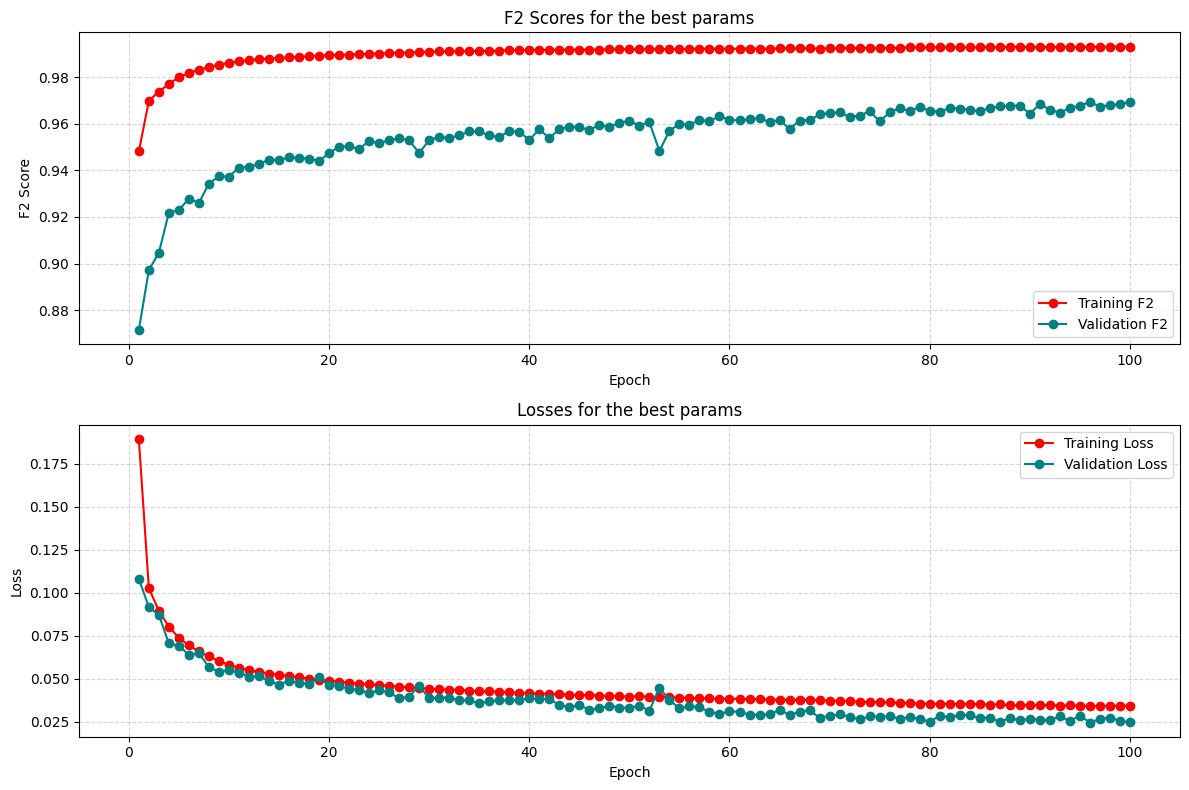

In [ ]:
import matplotlib.pyplot as plt
#plot F2 scores for training and validation
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(range(1, len(classifier.train_f2_scores) + 1), classifier.train_f2_scores, 'o-', label="Training F2", color='red')
plt.plot(range(1, len(classifier.val_f2_scores) + 1), classifier.val_f2_scores, 'o-', label="Validation F2", color='teal')
plt.xlabel("Epoch")
plt.ylabel("F2 Score")
plt.title(f"F2 Scores for the best params")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xlim(-5, len(classifier.train_f2_scores) + 5)  #start x-axis at 1

#plot Losses for training and validation
plt.subplot(2, 1, 2)
plt.plot(range(1, len(classifier.train_losses) + 1), classifier.train_losses, 'o-', label="Training Loss", color='red')
plt.plot(range(1, len(classifier.val_losses) + 1), classifier.val_losses, 'o-', label="Validation Loss", color='teal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Losses for the best params")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xlim(-5, len(classifier.train_losses) + 5)  #start x-axis at 1

plt.tight_layout()
plt.show()


Feature reference definitions

In [ ]:
#replace feature names with descriptions
features_reference_df = pd.read_csv("/home/jespinm/power_references/features_reference.csv", delimiter=',')
features_reference = features_reference_df.set_index('tag')['feature'].to_dict()
def get_feature_description(feature_name):
    return features_reference.get(feature_name, feature_name)
features_reference

{'cfcfe6/g6te703': 'Main bearing 3 temp.',
 'cfcfe6/g6te401eu': 'HT-water temp. jacket inlet',
 'cfcfe6/g6tc51b': 'Exh. gas temp. cyl. B1',
 'cfcfe6/g6fueloilcomsum': 'Fuel oil consumption from flow rate',
 'cfcfe6/g6pressspmin': 'Receiver press. control, sp. min. limit',
 'cfcfe6/g6pt201eu': 'Lube oil inlet pressure',
 'cfcfe6/g6te704': 'Main bearing 4 temp.',
 'cfcfe6/g6te805eu': 'Gen. ND-end bearing temp.',
 'cfcfe6/g6frequencyhzeu': 'Generator frequency',
 'cfcfe6/g6tc56b': 'Exh. gas temp. cyl. B6',
 'cfcfe6/g6te521': 'Exhaust gas temp TC B inlet',
 'cfcfe6/g6te804eu': 'Gen. D-end bearing temp.',
 'cfcfe6/g6tc59a': 'Exh. gas temp. cyl. A9',
 'cfcfe6/g6pmuu23': 'Generator main voltage U23',
 'cfcfe6/g6fueloilinflow': 'Fuel oil inlet flow',
 'cfcfe6/g6st528eu': 'Turbo B speed',
 'cfcfe6/g6pt471eu': 'LT-water pressure CAC inlet',
 'cfcfe6/g6tc52b': 'Exh. gas temp. cyl. B2',
 'cfcfe6/g6tc58b': 'Exh. gas temp. cyl. B8',
 'cfcfe6/g6te709': 'Main bearing 9 temp.',
 'cfcfe6/g6te702': 'Main

In [ ]:
#verification of the state of the cuda device
device = next(classifier.model.parameters()).device
print(device)

cuda:3


Making predictions over the available de device on the server

In [ ]:
from sklearn.metrics import accuracy_score
import torch

#move the validation data to the same device, we use to 0 for most of system may have only one cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
X_val_scaled_tensor = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)

#make sure the model is on the same device
classifier.model = classifier.model.to(device)

#now, make predictions
with torch.no_grad():
    y_val_pred_tensor = classifier.model(X_val_scaled_tensor)

#apply sigmoid to convert logits to probabilities
y_val_pred_prob = torch.sigmoid(y_val_pred_tensor)

#convert probabilities to binary predictions using 0.5 threshold
y_val_pred = (y_val_pred_prob > 0.5).cpu().numpy().astype(int)

#continue with the accuracy score calculation
accuracy = accuracy_score(y_val_raw, y_val_pred)
print(f'Validation Accuracy: {accuracy}')

Validation Accuracy: 0.9888007054673721


In [ ]:
#shape verification
print(X_train_scaled.shape, X_val_scaled.shape)

(6940080, 86) (612360, 86)


In [ ]:
#analyse variance
print(X_train.var())

cfcfe6/g6actuatorout        5.158430e+02
cfcfe6/g6aparentpowerpmu    1.229259e+07
cfcfe6/g6avgcyltmp          1.201098e+05
cfcfe6/g6frequencyhzeu      7.855707e+02
cfcfe6/g6fueloilcomsum      1.403667e+01
                                ...     
cfcfe6/g6te801eu            3.062610e+03
cfcfe6/g6te802eu            3.070004e+03
cfcfe6/g6te803eu            3.117123e+03
cfcfe6/g6te804eu            3.831223e+03
cfcfe6/g6te805eu            3.531644e+03
Length: 86, dtype: float64


Features Importance based on Integrated Gradients

In [ ]:
#feature importance gradient based
from captum.attr import IntegratedGradients
import torch

#set device to available cuda:3
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

#clear the memory of cuda:1
torch.cuda.set_device(device)
torch.cuda.empty_cache()

#move the model to cuda:1
classifier.model = classifier.model.to(device)

#initialize Integrated Gradients
ig = IntegratedGradients(classifier.model)

#define batch size to control memory usage
batch_size = 16384  #choose a batch size that fits in your memory

#create DataLoader for validation data
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
val_loader = torch.utils.data.DataLoader(X_val_tensor, batch_size=batch_size, shuffle=False)

#compute feature attributions for each batch
print(len(val_loader))
attributions = []
for e, batch in enumerate(val_loader):
    with torch.no_grad():
        #compute attributions for the batch
        attr, delta = ig.attribute(batch, target=0, return_convergence_delta=True)
        print(e)
        attributions.append(attr.cpu().detach().numpy())

#concatenate all the attributions
attributions = np.concatenate(attributions, axis=0)

38
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


Feature Importance Analysis

<ipython-input-65-9c3a05834a0a>:51: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis_r'), label='Feature Importance')  # Use inverted colormap


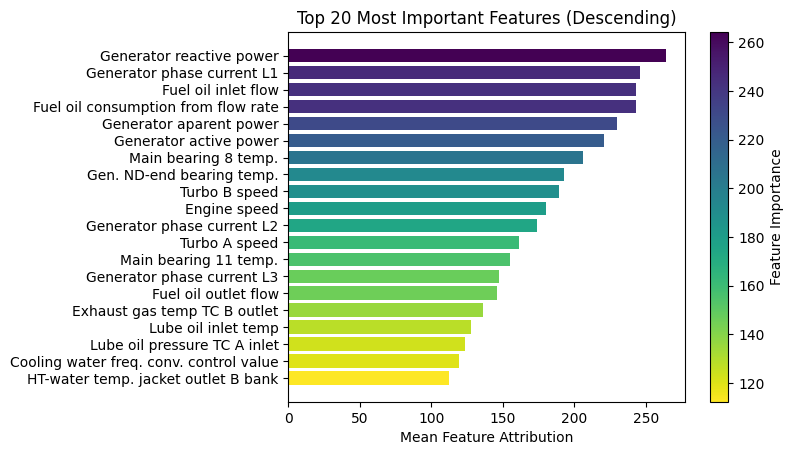

In [ ]:
import joblib
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

#define the model directory
model_dir = '/home/jespinm/models/ANN05'

#compute mean absolute attributions
mean_attr = np.mean(np.abs(attributions), axis=0)

#sort the attributions in descending order
sorted_idx = np.argsort(mean_attr)[::-1]

#get the original feature names (without mapping)
original_feature_names = X_train.columns[sorted_idx]

#prepare the full list of original feature names and importances
all_features_original = original_feature_names
all_importances = mean_attr[sorted_idx]

#save all original feature names and their importances to a file in the model directory
result = {
    'features': list(all_features_original),
    'importances': all_importances
}

#ensure the directory exists
os.makedirs(model_dir, exist_ok=True)

#save the feature importances to the specified directory
joblib.dump(result, os.path.join(model_dir, 'result_feature_importance.pkl'))

#map feature names for plotting
mapped_feature_names = [get_feature_description(feature) for feature in all_features_original]

#plot only the top 20 most important features (with mapped names)
top_20_features = mapped_feature_names[:20]
top_20_importances = all_importances[:20]

#normalize and use Viridis colormap for plotting
norm = plt.Normalize(vmin=min(top_20_importances), vmax=max(top_20_importances))
colors = cm.viridis_r(norm(top_20_importances))  # Use inverted Viridis colormap

#plot the top 20 sorted attributions with the most important features at the top
plt.barh(top_20_features, top_20_importances, color=colors)
plt.xlabel('Mean Feature Attribution')
plt.title('Top 20 Most Important Features (Descending)')
plt.gca().invert_yaxis()
plt.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis_r'), label='Feature Importance')
plt.show()


Inspect for any trus condition value predictor

In [ ]:
#check if there is any positive prediction failure

#model uses a sigmoid output for binary classification
predictions = []

#loop through the validation data and get predictions
for e, batch in enumerate(val_loader):
    with torch.no_grad():
        #get model predictions
        outputs = classifier.model(batch)
        probs = torch.sigmoid(outputs).cpu().numpy()  #apply sigmoid to get probabilities
        pred_classes = (probs > 0.5).astype(int)  #convert probabilities to binary predictions (0 or 1)
        predictions.extend(pred_classes)

#check if any prediction is 1 verification
if any(pred == 1 for pred in predictions):
    print("There are predictions for class 1.")
else:
    print("No predictions for class 1.")

There are predictions for class 1.
